In [ ]:
### done

In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
from tensorflow_core.python.keras.wrappers.scikit_learn import KerasClassifier
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
data= pd.read_csv('../logis_norm.csv')

### split data en X et Y

In [3]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### Neural Network

In [5]:
## ANN Model
def create_model(optimizer):
    model = Sequential()
	#Layer 1
    model.add(Dense(20, activation='relu', input_dim=20))
    model.add(Dropout(0.3))
    #Layer 2
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.3))
    
    # output layer
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN = KerasClassifier(build_fn=create_model)
params={'optimizer' : ['adam', 'rmsprop'],
        'batch_size': [128, 256, 512, 800]}

In [7]:
##accuracy
grid_search_acc= GridSearchCV(estimator=ANN, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop])
y_predict= grid_search_acc.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 3s 67us/sample - loss: 0.6162 - accuracy: 0.6975 - val_loss: 0.5754 - val_accuracy: 0.7303
Epoch 2/300
42845/42845 [==============================] - 2s 38us/sample - loss: 0.5800 - accuracy: 0.7368 - val_loss: 0.5716 - val_accuracy: 0.7303
Epoch 3/300
42845/42845 [==============================] - 3s 66us/sample - loss: 0.5739 - accuracy: 0.7371 - val_loss: 0.5705 - val_accuracy: 0.7303
Epoch 4/300
42845/42845 [==============================] - 2s 41us/sample - loss: 0.5714 - accuracy: 0.7371 - val_loss: 0.5705 - val_accuracy: 0.7303
Epoch 5/300
42845/42845 [==============================] - 2s 52us/sample - loss: 0.5699 - accuracy: 0.7371 - val_loss: 0.5702 - val_accuracy: 0.7303
Epoch 6/300
42845/42845 [==============================] - 3s 62us/sample - loss: 0.5688 - accuracy: 0.7371 - val_loss: 0.5707 - val_accuracy: 0.7303
Epoch 7/300
42845/42845 [=========================

Epoch 55/300
42845/42845 [==============================] - 2s 53us/sample - loss: 0.5643 - accuracy: 0.7368 - val_loss: 0.5698 - val_accuracy: 0.7303
Epoch 56/300
42845/42845 [==============================] - 2s 50us/sample - loss: 0.5648 - accuracy: 0.7369 - val_loss: 0.5697 - val_accuracy: 0.7303
Epoch 57/300
42845/42845 [==============================] - 2s 55us/sample - loss: 0.5645 - accuracy: 0.7369 - val_loss: 0.5698 - val_accuracy: 0.7303
Epoch 58/300
42845/42845 [==============================] - 2s 37us/sample - loss: 0.5650 - accuracy: 0.7367 - val_loss: 0.5704 - val_accuracy: 0.7303
Epoch 59/300
42845/42845 [==============================] - 2s 45us/sample - loss: 0.5651 - accuracy: 0.7366 - val_loss: 0.5704 - val_accuracy: 0.7303
Epoch 60/300
42845/42845 [==============================] - 2s 55us/sample - loss: 0.5653 - accuracy: 0.7372 - val_loss: 0.5704 - val_accuracy: 0.7303
Epoch 61/300
42845/42845 [==============================] - 2s 43us/sample - loss: 0.5652 - ac

In [8]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'optimizer': 'adam', 'batch_size': 128}
----------
[[    0  4952]
 [    0 13411]]
----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4952
           1       0.73      1.00      0.84     13411

    accuracy                           0.73     18363
   macro avg       0.37      0.50      0.42     18363
weighted avg       0.53      0.73      0.62     18363

----------


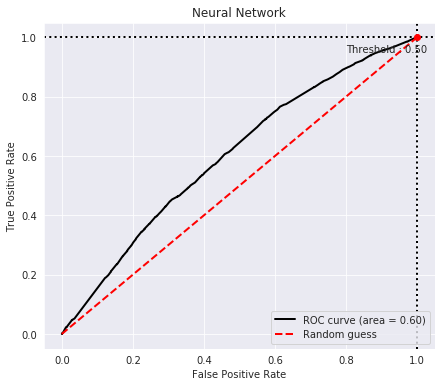

In [9]:
##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('Neural Network')
plt.show()

In [10]:
early_stop_rec = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec = KerasClassifier(build_fn=create_model)

In [11]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=ANN_rec, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_rec])
y_predict= grid_search_rec.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 3s 70us/sample - loss: 0.5980 - accuracy: 0.7228 - val_loss: 0.5742 - val_accuracy: 0.7303
Epoch 2/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.5786 - accuracy: 0.7371 - val_loss: 0.5716 - val_accuracy: 0.7303
Epoch 3/300
42845/42845 [==============================] - 2s 41us/sample - loss: 0.5734 - accuracy: 0.7371 - val_loss: 0.5701 - val_accuracy: 0.7303
Epoch 4/300
42845/42845 [==============================] - 1s 34us/sample - loss: 0.5707 - accuracy: 0.7371 - val_loss: 0.5704 - val_accuracy: 0.7303
Epoch 5/300
42845/42845 [==============================] - 2s 51us/sample - loss: 0.5697 - accuracy: 0.7371 - val_loss: 0.5708 - val_accuracy: 0.7303
Epoch 6/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.5680 - accuracy: 0.7371 - val_loss: 0.5702 - val_accuracy: 0.7303
Epoch 7/300
42845/42845 [=========================

Epoch 55/300
42845/42845 [==============================] - 2s 53us/sample - loss: 0.5652 - accuracy: 0.7363 - val_loss: 0.5705 - val_accuracy: 0.7303
Epoch 56/300
42845/42845 [==============================] - 2s 46us/sample - loss: 0.5648 - accuracy: 0.7369 - val_loss: 0.5699 - val_accuracy: 0.7303
Epoch 57/300
42845/42845 [==============================] - 2s 42us/sample - loss: 0.5647 - accuracy: 0.7371 - val_loss: 0.5700 - val_accuracy: 0.7303
Epoch 58/300
42845/42845 [==============================] - 2s 45us/sample - loss: 0.5645 - accuracy: 0.7360 - val_loss: 0.5706 - val_accuracy: 0.7303
Epoch 59/300
42845/42845 [==============================] - 2s 43us/sample - loss: 0.5650 - accuracy: 0.7369 - val_loss: 0.5697 - val_accuracy: 0.7303
Epoch 60/300
42845/42845 [==============================] - 2s 45us/sample - loss: 0.5653 - accuracy: 0.7367 - val_loss: 0.5698 - val_accuracy: 0.7303
Epoch 61/300
42845/42845 [==============================] - 2s 46us/sample - loss: 0.5650 - ac

In [12]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


----------
best parameters:  {'optimizer': 'adam', 'batch_size': 128}
----------
[[    0  4952]
 [    0 13411]]
----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4952
           1       0.73      1.00      0.84     13411

    accuracy                           0.73     18363
   macro avg       0.37      0.50      0.42     18363
weighted avg       0.53      0.73      0.62     18363

----------


In [13]:
early_stop_prec_avg = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec_prec_avg = KerasClassifier(build_fn=create_model)

In [14]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=ANN_rec_prec_avg, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_prec_avg])
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 4s 83us/sample - loss: 0.5910 - accuracy: 0.7311 - val_loss: 0.5719 - val_accuracy: 0.7303
Epoch 2/300
42845/42845 [==============================] - 2s 56us/sample - loss: 0.5742 - accuracy: 0.7371 - val_loss: 0.5714 - val_accuracy: 0.7303
Epoch 3/300
42845/42845 [==============================] - 3s 59us/sample - loss: 0.5717 - accuracy: 0.7371 - val_loss: 0.5714 - val_accuracy: 0.7303
Epoch 4/300
42845/42845 [==============================] - 2s 50us/sample - loss: 0.5698 - accuracy: 0.7371 - val_loss: 0.5718 - val_accuracy: 0.7303
Epoch 5/300
42845/42845 [==============================] - 2s 42us/sample - loss: 0.5694 - accuracy: 0.7371 - val_loss: 0.5728 - val_accuracy: 0.7303
Epoch 6/300
42845/42845 [==============================] - 2s 58us/sample - loss: 0.5679 - accuracy: 0.7371 - val_loss: 0.5707 - val_accuracy: 0.7303
Epoch 7/300
42845/42845 [=========================

Epoch 55/300
42845/42845 [==============================] - 2s 48us/sample - loss: 0.5660 - accuracy: 0.7371 - val_loss: 0.5701 - val_accuracy: 0.7303
Epoch 56/300
42845/42845 [==============================] - 3s 64us/sample - loss: 0.5661 - accuracy: 0.7371 - val_loss: 0.5705 - val_accuracy: 0.7303
Epoch 57/300
42845/42845 [==============================] - 2s 56us/sample - loss: 0.5657 - accuracy: 0.7371 - val_loss: 0.5704 - val_accuracy: 0.7303
Epoch 58/300
42845/42845 [==============================] - 2s 42us/sample - loss: 0.5651 - accuracy: 0.7371 - val_loss: 0.5701 - val_accuracy: 0.7303
Epoch 59/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.5647 - accuracy: 0.7372 - val_loss: 0.5700 - val_accuracy: 0.7303
Epoch 60/300
42845/42845 [==============================] - 3s 74us/sample - loss: 0.5654 - accuracy: 0.7372 - val_loss: 0.5700 - val_accuracy: 0.7303
Epoch 61/300
42845/42845 [==============================] - 2s 45us/sample - loss: 0.5652 - ac

In [15]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'optimizer': 'adam', 'batch_size': 128}
----------
[[    0  4952]
 [    0 13411]]
----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4952
           1       0.73      1.00      0.84     13411

    accuracy                           0.73     18363
   macro avg       0.37      0.50      0.42     18363
weighted avg       0.53      0.73      0.62     18363

----------


In [16]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))
    scores_mean = scores_mean.T
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.83,0.855])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


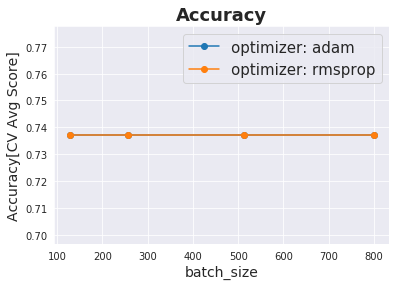

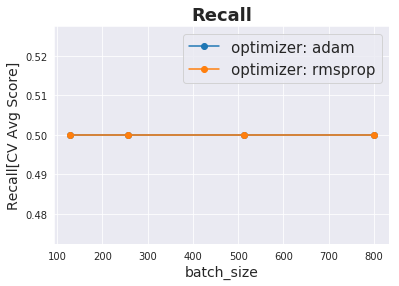

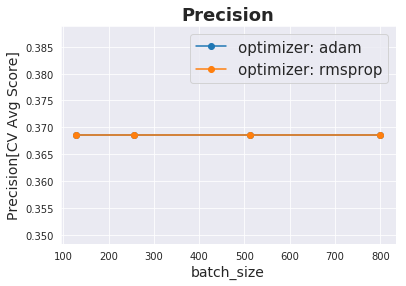

In [17]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Precision')


In [18]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list

In [19]:
index= return_index_list(params['batch_size'], params['optimizer'])

df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                    'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)

writer = pd.ExcelWriter('Neural_Network.xlsx')
df.to_excel(writer, 'Neural_Network')
writer.save()
writer.close()

In [20]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[128, adam]",0.737146,0.368573,0.5,0.002188
"[128, rmsprop]",0.737146,0.368573,0.5,0.002188
"[256, adam]",0.737146,0.368573,0.5,0.002188
"[256, rmsprop]",0.737146,0.368573,0.5,0.002188
"[512, adam]",0.737146,0.368573,0.5,0.002188
"[512, rmsprop]",0.737146,0.368573,0.5,0.002188
"[800, adam]",0.737146,0.368573,0.5,0.002188
"[800, rmsprop]",0.737146,0.368573,0.5,0.002188


In [21]:
## check for overfiting
model_ov= create_model("adam")
history= model_ov.fit(x=X_train, y=Y_train, epochs=300, batch_size=800, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop])


Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 3s 68us/sample - loss: 0.6325 - accuracy: 0.6693 - val_loss: 0.5838 - val_accuracy: 0.7303
Epoch 2/300
42845/42845 [==============================] - 1s 29us/sample - loss: 0.5964 - accuracy: 0.7321 - val_loss: 0.5788 - val_accuracy: 0.7303
Epoch 3/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.5917 - accuracy: 0.7356 - val_loss: 0.5780 - val_accuracy: 0.7303
Epoch 4/300
42845/42845 [==============================] - 1s 12us/sample - loss: 0.5861 - accuracy: 0.7368 - val_loss: 0.5756 - val_accuracy: 0.7303
Epoch 5/300
42845/42845 [==============================] - 1s 12us/sample - loss: 0.5827 - accuracy: 0.7370 - val_loss: 0.5763 - val_accuracy: 0.7303
Epoch 6/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.5807 - accuracy: 0.7371 - val_loss: 0.5737 - val_accuracy: 0.7303
Epoch 7/300
42845/42845 [=========================

Epoch 55/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.5648 - accuracy: 0.7371 - val_loss: 0.5696 - val_accuracy: 0.7303
Epoch 56/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.5650 - accuracy: 0.7370 - val_loss: 0.5698 - val_accuracy: 0.7303
Epoch 57/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.5650 - accuracy: 0.7371 - val_loss: 0.5698 - val_accuracy: 0.7303
Epoch 58/300
42845/42845 [==============================] - 1s 17us/sample - loss: 0.5653 - accuracy: 0.7371 - val_loss: 0.5696 - val_accuracy: 0.7303
Epoch 59/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.5652 - accuracy: 0.7371 - val_loss: 0.5695 - val_accuracy: 0.7303
Epoch 60/300
42845/42845 [==============================] - 1s 18us/sample - loss: 0.5648 - accuracy: 0.7371 - val_loss: 0.5696 - val_accuracy: 0.7303
Epoch 61/300
42845/42845 [==============================] - 1s 30us/sample - loss: 0.5653 - ac

42845/42845 [==============================] - 1s 12us/sample - loss: 0.5646 - accuracy: 0.7371 - val_loss: 0.5696 - val_accuracy: 0.7303


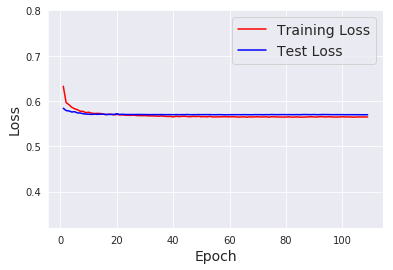

In [22]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
_, ax = plt.subplots(1,1)
ax.set_ylim([0.32,0.8])
ax.plot(epoch_count, training_loss, 'r-')
ax.plot(epoch_count, test_loss, 'b-')

ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(['Training Loss', 'Test Loss'], fontsize=14)
ax.grid('on')
